# Instructions for Manual Simulation

1. Decide on a name for your model.  Add first letter of your name and numbers as prefix  For example: `t0_dummy`.
2. Create a `.py` file with the name of your model in the `trade_models` directory (`./trade_models/t0_dummy.py`)
3. Import your model in `./trade_models/__init__.py` by adding `from . import t0_dummy`
4. Place any pre-trained models or scalers into the `./trade_models/assets/` directory with your model name as prefix.
5. Configure portfolio in the following cells.
    1. For `max_batch_size`, it is purely for memory considerations.  It does an SQL query per batch, so don't make it too small.
    2. Parameters inside portfolios are accessible inside the trade models
6. Run all

Sample portfolio (all fields must exist)
```
    {
        'portfolio_name' : f'BTC <-> ETH {model_name}',
        'trade_model' : model_name,
        'starting_coin' : 'BTC',
        'pair_coin' : 'ETH',
        'max_batch_size' : 10000,
        'starting_funds' : 1,    
    }
```

In [1]:
start_simulation = '2021-01-01' #YYYY-MM-DD
end_simulation = '2021-07-10' #YYYY-MM-DD
model_name = 'n0_alpha1_ethbtc'

portfolios = [
    { # start with 1 ETH, trade against BTC
        'portfolio_name' : f'ETH <-> BTC {model_name}',
        'trade_model' : model_name,
        'model_filepath': 'trade_models/assets/nm_grad_boost_2107261356.pkl',
        'starting_coin' : 'ETH',
        'pair_coin' : 'BTC',
        'max_batch_size' : 10000,
        'starting_funds' : 1,    
    }
]

# Play testing...

In [3]:
import psycopg2
import pandas as pd
import numpy as np
import re

import trade_models


start_simulation = '2018-01-01' #YYYY-MM-DD
end_simulation = '2021-12-31' #YYYY-MM-DD
model_name = 'n0_alpha1_ethbtc'

portfolios_test = [
    { # start with 1 ETH, trade against BTC
        'portfolio_name' : f'ETH <-> BTC {model_name}',
        'trade_model' : model_name,
        'model_filepath': 'trade_models/assets/grad_boost_2107261356.pkl',
        'starting_coin' : 'ETH',
        'pair_coin' : 'BTC',
        'max_batch_size' : 100,
        'starting_funds' : 1,    
    }
]

portfolio = portfolios_test[0]
portfolio_name = portfolio['portfolio_name']
trade_model = portfolio['trade_model']
starting_coin = portfolio['starting_coin']
pair_coin = portfolio['pair_coin']
max_batch_size = portfolio['max_batch_size']
starting_funds = portfolio['starting_funds']

info_dict = {'portfolio':portfolio}

# local postgres connection only
import hidden
sql_string = hidden.psycopg2(hidden.secrets())
print('PostgreSQL connection data taken from hidden.py')

# Make the connection and cursor
conn = psycopg2.connect(sql_string, connect_timeout=3)

model = trade_models.__dict__[trade_model]
columns = model.columns()

PostgreSQL connection data taken from hidden.py


In [4]:
def get_batch_data(pair_id, start_time, end_time, batch_size):
    sql = f"""select * from (select
    *,
    LAG(open,1) over (order by open_time) open_1,LAG(open,2) over (order by open_time) open_2,LAG(open,3) over (order by open_time) open_3,LAG(open,4) over (order by open_time) open_4,LAG(open,5) over (order by open_time) open_5,LAG(open,6) over (order by open_time) open_6,LAG(open,7) over (order by open_time) open_7,LAG(open,8) over (order by open_time) open_8,LAG(open,9) over (order by open_time) open_9,LAG(open,10) over (order by open_time) open_10,LAG(open,11) over (order by open_time) open_11,LAG(open,12) over (order by open_time) open_12,LAG(open,13) over (order by open_time) open_13,LAG(open,14) over (order by open_time) open_14,LAG(high,1) over (order by open_time) high_1,LAG(high,2) over (order by open_time) high_2,LAG(high,3) over (order by open_time) high_3,LAG(high,4) over (order by open_time) high_4,LAG(high,5) over (order by open_time) high_5,LAG(high,6) over (order by open_time) high_6,LAG(high,7) over (order by open_time) high_7,LAG(high,8) over (order by open_time) high_8,LAG(high,9) over (order by open_time) high_9,LAG(high,10) over (order by open_time) high_10,LAG(high,11) over (order by open_time) high_11,LAG(high,12) over (order by open_time) high_12,LAG(high,13) over (order by open_time) high_13,LAG(high,14) over (order by open_time) high_14,LAG(low,1) over (order by open_time) low_1,LAG(low,2) over (order by open_time) low_2,LAG(low,3) over (order by open_time) low_3,LAG(low,4) over (order by open_time) low_4,LAG(low,5) over (order by open_time) low_5,LAG(low,6) over (order by open_time) low_6,LAG(low,7) over (order by open_time) low_7,LAG(low,8) over (order by open_time) low_8,LAG(low,9) over (order by open_time) low_9,LAG(low,10) over (order by open_time) low_10,LAG(low,11) over (order by open_time) low_11,LAG(low,12) over (order by open_time) low_12,LAG(low,13) over (order by open_time) low_13,LAG(low,14) over (order by open_time) low_14,LAG(close,1) over (order by open_time) close_1,LAG(close,2) over (order by open_time) close_2,LAG(close,3) over (order by open_time) close_3,LAG(close,4) over (order by open_time) close_4,LAG(close,5) over (order by open_time) close_5,LAG(close,6) over (order by open_time) close_6,LAG(close,7) over (order by open_time) close_7,LAG(close,8) over (order by open_time) close_8,LAG(close,9) over (order by open_time) close_9,LAG(close,10) over (order by open_time) close_10,LAG(close,11) over (order by open_time) close_11,LAG(close,12) over (order by open_time) close_12,LAG(close,13) over (order by open_time) close_13,LAG(close,14) over (order by open_time) close_14,LAG(ma14,1) over (order by open_time) ma14_1,LAG(ma14,2) over (order by open_time) ma14_2,LAG(ma14,3) over (order by open_time) ma14_3,LAG(ma14,4) over (order by open_time) ma14_4,LAG(ma14,5) over (order by open_time) ma14_5,LAG(ma14,6) over (order by open_time) ma14_6,LAG(ma14,7) over (order by open_time) ma14_7,LAG(ma14,8) over (order by open_time) ma14_8,LAG(ma14,9) over (order by open_time) ma14_9,LAG(ma14,10) over (order by open_time) ma14_10,LAG(ma14,11) over (order by open_time) ma14_11,LAG(ma14,12) over (order by open_time) ma14_12,LAG(ma14,13) over (order by open_time) ma14_13,LAG(ma14,14) over (order by open_time) ma14_14,LAG(ma30,1) over (order by open_time) ma30_1,LAG(ma30,2) over (order by open_time) ma30_2,LAG(ma30,3) over (order by open_time) ma30_3,LAG(ma30,4) over (order by open_time) ma30_4,LAG(ma30,5) over (order by open_time) ma30_5,LAG(ma30,6) over (order by open_time) ma30_6,LAG(ma30,7) over (order by open_time) ma30_7,LAG(ma30,8) over (order by open_time) ma30_8,LAG(ma30,9) over (order by open_time) ma30_9,LAG(ma30,10) over (order by open_time) ma30_10,LAG(ma30,11) over (order by open_time) ma30_11,LAG(ma30,12) over (order by open_time) ma30_12,LAG(ma30,13) over (order by open_time) ma30_13,LAG(ma30,14) over (order by open_time) ma30_14,LAG(ma90,1) over (order by open_time) ma90_1,LAG(ma90,2) over (order by open_time) ma90_2,LAG(ma90,3) over (order by open_time) ma90_3,LAG(ma90,4) over (order by open_time) ma90_4,LAG(ma90,5) over (order by open_time) ma90_5,LAG(ma90,6) over (order by open_time) ma90_6,LAG(ma90,7) over (order by open_time) ma90_7,LAG(ma90,8) over (order by open_time) ma90_8,LAG(ma90,9) over (order by open_time) ma90_9,LAG(ma90,10) over (order by open_time) ma90_10,LAG(ma90,11) over (order by open_time) ma90_11,LAG(ma90,12) over (order by open_time) ma90_12,LAG(ma90,13) over (order by open_time) ma90_13,LAG(ma90,14) over (order by open_time) ma90_14,LAG(atr,1) over (order by open_time) atr_1,LAG(atr,2) over (order by open_time) atr_2,LAG(atr,3) over (order by open_time) atr_3,LAG(atr,4) over (order by open_time) atr_4,LAG(atr,5) over (order by open_time) atr_5,LAG(atr,6) over (order by open_time) atr_6,LAG(atr,7) over (order by open_time) atr_7,LAG(atr,8) over (order by open_time) atr_8,LAG(atr,9) over (order by open_time) atr_9,LAG(atr,10) over (order by open_time) atr_10,LAG(atr,11) over (order by open_time) atr_11,LAG(atr,12) over (order by open_time) atr_12,LAG(atr,13) over (order by open_time) atr_13,LAG(atr,14) over (order by open_time) atr_14,LAG(atr_diff,1) over (order by open_time) atr_diff_1,LAG(atr_diff,2) over (order by open_time) atr_diff_2,LAG(atr_diff,3) over (order by open_time) atr_diff_3,LAG(atr_diff,4) over (order by open_time) atr_diff_4,LAG(atr_diff,5) over (order by open_time) atr_diff_5,LAG(atr_diff,6) over (order by open_time) atr_diff_6,LAG(atr_diff,7) over (order by open_time) atr_diff_7,LAG(atr_diff,8) over (order by open_time) atr_diff_8,LAG(atr_diff,9) over (order by open_time) atr_diff_9,LAG(atr_diff,10) over (order by open_time) atr_diff_10,LAG(atr_diff,11) over (order by open_time) atr_diff_11,LAG(atr_diff,12) over (order by open_time) atr_diff_12,LAG(atr_diff,13) over (order by open_time) atr_diff_13,LAG(atr_diff,14) over (order by open_time) atr_diff_14,LAG(atr_ma14,1) over (order by open_time) atr_ma14_1,LAG(atr_ma14,2) over (order by open_time) atr_ma14_2,LAG(atr_ma14,3) over (order by open_time) atr_ma14_3,LAG(atr_ma14,4) over (order by open_time) atr_ma14_4,LAG(atr_ma14,5) over (order by open_time) atr_ma14_5,LAG(atr_ma14,6) over (order by open_time) atr_ma14_6,LAG(atr_ma14,7) over (order by open_time) atr_ma14_7,LAG(atr_ma14,8) over (order by open_time) atr_ma14_8,LAG(atr_ma14,9) over (order by open_time) atr_ma14_9,LAG(atr_ma14,10) over (order by open_time) atr_ma14_10,LAG(atr_ma14,11) over (order by open_time) atr_ma14_11,LAG(atr_ma14,12) over (order by open_time) atr_ma14_12,LAG(atr_ma14,13) over (order by open_time) atr_ma14_13,LAG(atr_ma14,14) over (order by open_time) atr_ma14_14,LAG(rsi,1) over (order by open_time) rsi_1,LAG(rsi,2) over (order by open_time) rsi_2,LAG(rsi,3) over (order by open_time) rsi_3,LAG(rsi,4) over (order by open_time) rsi_4,LAG(rsi,5) over (order by open_time) rsi_5,LAG(rsi,6) over (order by open_time) rsi_6,LAG(rsi,7) over (order by open_time) rsi_7,LAG(rsi,8) over (order by open_time) rsi_8,LAG(rsi,9) over (order by open_time) rsi_9,LAG(rsi,10) over (order by open_time) rsi_10,LAG(rsi,11) over (order by open_time) rsi_11,LAG(rsi,12) over (order by open_time) rsi_12,LAG(rsi,13) over (order by open_time) rsi_13,LAG(rsi,14) over (order by open_time) rsi_14,LAG(rsi_diff,1) over (order by open_time) rsi_diff_1,LAG(rsi_diff,2) over (order by open_time) rsi_diff_2,LAG(rsi_diff,3) over (order by open_time) rsi_diff_3,LAG(rsi_diff,4) over (order by open_time) rsi_diff_4,LAG(rsi_diff,5) over (order by open_time) rsi_diff_5,LAG(rsi_diff,6) over (order by open_time) rsi_diff_6,LAG(rsi_diff,7) over (order by open_time) rsi_diff_7,LAG(rsi_diff,8) over (order by open_time) rsi_diff_8,LAG(rsi_diff,9) over (order by open_time) rsi_diff_9,LAG(rsi_diff,10) over (order by open_time) rsi_diff_10,LAG(rsi_diff,11) over (order by open_time) rsi_diff_11,LAG(rsi_diff,12) over (order by open_time) rsi_diff_12,LAG(rsi_diff,13) over (order by open_time) rsi_diff_13,LAG(rsi_diff,14) over (order by open_time) rsi_diff_14,LAG(rsi_ma14,1) over (order by open_time) rsi_ma14_1,LAG(rsi_ma14,2) over (order by open_time) rsi_ma14_2,LAG(rsi_ma14,3) over (order by open_time) rsi_ma14_3,LAG(rsi_ma14,4) over (order by open_time) rsi_ma14_4,LAG(rsi_ma14,5) over (order by open_time) rsi_ma14_5,LAG(rsi_ma14,6) over (order by open_time) rsi_ma14_6,LAG(rsi_ma14,7) over (order by open_time) rsi_ma14_7,LAG(rsi_ma14,8) over (order by open_time) rsi_ma14_8,LAG(rsi_ma14,9) over (order by open_time) rsi_ma14_9,LAG(rsi_ma14,10) over (order by open_time) rsi_ma14_10,LAG(rsi_ma14,11) over (order by open_time) rsi_ma14_11,LAG(rsi_ma14,12) over (order by open_time) rsi_ma14_12,LAG(rsi_ma14,13) over (order by open_time) rsi_ma14_13,LAG(rsi_ma14,14) over (order by open_time) rsi_ma14_14,LAG(trend_up,1) over (order by open_time) trend_up_1,LAG(trend_up,2) over (order by open_time) trend_up_2,LAG(trend_up,3) over (order by open_time) trend_up_3,LAG(trend_up,4) over (order by open_time) trend_up_4,LAG(trend_up,5) over (order by open_time) trend_up_5,LAG(trend_up,6) over (order by open_time) trend_up_6,LAG(trend_up,7) over (order by open_time) trend_up_7,LAG(trend_up,8) over (order by open_time) trend_up_8,LAG(trend_up,9) over (order by open_time) trend_up_9,LAG(trend_up,10) over (order by open_time) trend_up_10,LAG(trend_up,11) over (order by open_time) trend_up_11,LAG(trend_up,12) over (order by open_time) trend_up_12,LAG(trend_up,13) over (order by open_time) trend_up_13,LAG(trend_up,14) over (order by open_time) trend_up_14,LAG(trend_up3,1) over (order by open_time) trend_up3_1,LAG(trend_up3,2) over (order by open_time) trend_up3_2,LAG(trend_up3,3) over (order by open_time) trend_up3_3,LAG(trend_up3,4) over (order by open_time) trend_up3_4,LAG(trend_up3,5) over (order by open_time) trend_up3_5,LAG(trend_up3,6) over (order by open_time) trend_up3_6,LAG(trend_up3,7) over (order by open_time) trend_up3_7,LAG(trend_up3,8) over (order by open_time) trend_up3_8,LAG(trend_up3,9) over (order by open_time) trend_up3_9,LAG(trend_up3,10) over (order by open_time) trend_up3_10,LAG(trend_up3,11) over (order by open_time) trend_up3_11,LAG(trend_up3,12) over (order by open_time) trend_up3_12,LAG(trend_up3,13) over (order by open_time) trend_up3_13,LAG(trend_up3,14) over (order by open_time) trend_up3_14,LAG(trend_up14,1) over (order by open_time) trend_up14_1,LAG(trend_up14,2) over (order by open_time) trend_up14_2,LAG(trend_up14,3) over (order by open_time) trend_up14_3,LAG(trend_up14,4) over (order by open_time) trend_up14_4,LAG(trend_up14,5) over (order by open_time) trend_up14_5,LAG(trend_up14,6) over (order by open_time) trend_up14_6,LAG(trend_up14,7) over (order by open_time) trend_up14_7,LAG(trend_up14,8) over (order by open_time) trend_up14_8,LAG(trend_up14,9) over (order by open_time) trend_up14_9,LAG(trend_up14,10) over (order by open_time) trend_up14_10,LAG(trend_up14,11) over (order by open_time) trend_up14_11,LAG(trend_up14,12) over (order by open_time) trend_up14_12,LAG(trend_up14,13) over (order by open_time) trend_up14_13,LAG(trend_up14,14) over (order by open_time) trend_up14_14,LAG(trend_up30,1) over (order by open_time) trend_up30_1,LAG(trend_up30,2) over (order by open_time) trend_up30_2,LAG(trend_up30,3) over (order by open_time) trend_up30_3,LAG(trend_up30,4) over (order by open_time) trend_up30_4,LAG(trend_up30,5) over (order by open_time) trend_up30_5,LAG(trend_up30,6) over (order by open_time) trend_up30_6,LAG(trend_up30,7) over (order by open_time) trend_up30_7,LAG(trend_up30,8) over (order by open_time) trend_up30_8,LAG(trend_up30,9) over (order by open_time) trend_up30_9,LAG(trend_up30,10) over (order by open_time) trend_up30_10,LAG(trend_up30,11) over (order by open_time) trend_up30_11,LAG(trend_up30,12) over (order by open_time) trend_up30_12,LAG(trend_up30,13) over (order by open_time) trend_up30_13,LAG(trend_up30,14) over (order by open_time) trend_up30_14,LAG(cs_ss,1) over (order by open_time) cs_ss_1,LAG(cs_ss,2) over (order by open_time) cs_ss_2,LAG(cs_ss,3) over (order by open_time) cs_ss_3,LAG(cs_ss,4) over (order by open_time) cs_ss_4,LAG(cs_ss,5) over (order by open_time) cs_ss_5,LAG(cs_ss,6) over (order by open_time) cs_ss_6,LAG(cs_ss,7) over (order by open_time) cs_ss_7,LAG(cs_ss,8) over (order by open_time) cs_ss_8,LAG(cs_ss,9) over (order by open_time) cs_ss_9,LAG(cs_ss,10) over (order by open_time) cs_ss_10,LAG(cs_ss,11) over (order by open_time) cs_ss_11,LAG(cs_ss,12) over (order by open_time) cs_ss_12,LAG(cs_ss,13) over (order by open_time) cs_ss_13,LAG(cs_ss,14) over (order by open_time) cs_ss_14,LAG(cs_ssr,1) over (order by open_time) cs_ssr_1,LAG(cs_ssr,2) over (order by open_time) cs_ssr_2,LAG(cs_ssr,3) over (order by open_time) cs_ssr_3,LAG(cs_ssr,4) over (order by open_time) cs_ssr_4,LAG(cs_ssr,5) over (order by open_time) cs_ssr_5,LAG(cs_ssr,6) over (order by open_time) cs_ssr_6,LAG(cs_ssr,7) over (order by open_time) cs_ssr_7,LAG(cs_ssr,8) over (order by open_time) cs_ssr_8,LAG(cs_ssr,9) over (order by open_time) cs_ssr_9,LAG(cs_ssr,10) over (order by open_time) cs_ssr_10,LAG(cs_ssr,11) over (order by open_time) cs_ssr_11,LAG(cs_ssr,12) over (order by open_time) cs_ssr_12,LAG(cs_ssr,13) over (order by open_time) cs_ssr_13,LAG(cs_ssr,14) over (order by open_time) cs_ssr_14,LAG(cs_hm,1) over (order by open_time) cs_hm_1,LAG(cs_hm,2) over (order by open_time) cs_hm_2,LAG(cs_hm,3) over (order by open_time) cs_hm_3,LAG(cs_hm,4) over (order by open_time) cs_hm_4,LAG(cs_hm,5) over (order by open_time) cs_hm_5,LAG(cs_hm,6) over (order by open_time) cs_hm_6,LAG(cs_hm,7) over (order by open_time) cs_hm_7,LAG(cs_hm,8) over (order by open_time) cs_hm_8,LAG(cs_hm,9) over (order by open_time) cs_hm_9,LAG(cs_hm,10) over (order by open_time) cs_hm_10,LAG(cs_hm,11) over (order by open_time) cs_hm_11,LAG(cs_hm,12) over (order by open_time) cs_hm_12,LAG(cs_hm,13) over (order by open_time) cs_hm_13,LAG(cs_hm,14) over (order by open_time) cs_hm_14,LAG(cs_hmr,1) over (order by open_time) cs_hmr_1,LAG(cs_hmr,2) over (order by open_time) cs_hmr_2,LAG(cs_hmr,3) over (order by open_time) cs_hmr_3,LAG(cs_hmr,4) over (order by open_time) cs_hmr_4,LAG(cs_hmr,5) over (order by open_time) cs_hmr_5,LAG(cs_hmr,6) over (order by open_time) cs_hmr_6,LAG(cs_hmr,7) over (order by open_time) cs_hmr_7,LAG(cs_hmr,8) over (order by open_time) cs_hmr_8,LAG(cs_hmr,9) over (order by open_time) cs_hmr_9,LAG(cs_hmr,10) over (order by open_time) cs_hmr_10,LAG(cs_hmr,11) over (order by open_time) cs_hmr_11,LAG(cs_hmr,12) over (order by open_time) cs_hmr_12,LAG(cs_hmr,13) over (order by open_time) cs_hmr_13,LAG(cs_hmr,14) over (order by open_time) cs_hmr_14,LAG(cs_brh,1) over (order by open_time) cs_brh_1,LAG(cs_brh,2) over (order by open_time) cs_brh_2,LAG(cs_brh,3) over (order by open_time) cs_brh_3,LAG(cs_brh,4) over (order by open_time) cs_brh_4,LAG(cs_brh,5) over (order by open_time) cs_brh_5,LAG(cs_brh,6) over (order by open_time) cs_brh_6,LAG(cs_brh,7) over (order by open_time) cs_brh_7,LAG(cs_brh,8) over (order by open_time) cs_brh_8,LAG(cs_brh,9) over (order by open_time) cs_brh_9,LAG(cs_brh,10) over (order by open_time) cs_brh_10,LAG(cs_brh,11) over (order by open_time) cs_brh_11,LAG(cs_brh,12) over (order by open_time) cs_brh_12,LAG(cs_brh,13) over (order by open_time) cs_brh_13,LAG(cs_brh,14) over (order by open_time) cs_brh_14,LAG(cs_buh,1) over (order by open_time) cs_buh_1,LAG(cs_buh,2) over (order by open_time) cs_buh_2,LAG(cs_buh,3) over (order by open_time) cs_buh_3,LAG(cs_buh,4) over (order by open_time) cs_buh_4,LAG(cs_buh,5) over (order by open_time) cs_buh_5,LAG(cs_buh,6) over (order by open_time) cs_buh_6,LAG(cs_buh,7) over (order by open_time) cs_buh_7,LAG(cs_buh,8) over (order by open_time) cs_buh_8,LAG(cs_buh,9) over (order by open_time) cs_buh_9,LAG(cs_buh,10) over (order by open_time) cs_buh_10,LAG(cs_buh,11) over (order by open_time) cs_buh_11,LAG(cs_buh,12) over (order by open_time) cs_buh_12,LAG(cs_buh,13) over (order by open_time) cs_buh_13,LAG(cs_buh,14) over (order by open_time) cs_buh_14,LAG(cs_ebu,1) over (order by open_time) cs_ebu_1,LAG(cs_ebu,2) over (order by open_time) cs_ebu_2,LAG(cs_ebu,3) over (order by open_time) cs_ebu_3,LAG(cs_ebu,4) over (order by open_time) cs_ebu_4,LAG(cs_ebu,5) over (order by open_time) cs_ebu_5,LAG(cs_ebu,6) over (order by open_time) cs_ebu_6,LAG(cs_ebu,7) over (order by open_time) cs_ebu_7,LAG(cs_ebu,8) over (order by open_time) cs_ebu_8,LAG(cs_ebu,9) over (order by open_time) cs_ebu_9,LAG(cs_ebu,10) over (order by open_time) cs_ebu_10,LAG(cs_ebu,11) over (order by open_time) cs_ebu_11,LAG(cs_ebu,12) over (order by open_time) cs_ebu_12,LAG(cs_ebu,13) over (order by open_time) cs_ebu_13,LAG(cs_ebu,14) over (order by open_time) cs_ebu_14,LAG(cs_ebr,1) over (order by open_time) cs_ebr_1,LAG(cs_ebr,2) over (order by open_time) cs_ebr_2,LAG(cs_ebr,3) over (order by open_time) cs_ebr_3,LAG(cs_ebr,4) over (order by open_time) cs_ebr_4,LAG(cs_ebr,5) over (order by open_time) cs_ebr_5,LAG(cs_ebr,6) over (order by open_time) cs_ebr_6,LAG(cs_ebr,7) over (order by open_time) cs_ebr_7,LAG(cs_ebr,8) over (order by open_time) cs_ebr_8,LAG(cs_ebr,9) over (order by open_time) cs_ebr_9,LAG(cs_ebr,10) over (order by open_time) cs_ebr_10,LAG(cs_ebr,11) over (order by open_time) cs_ebr_11,LAG(cs_ebr,12) over (order by open_time) cs_ebr_12,LAG(cs_ebr,13) over (order by open_time) cs_ebr_13,LAG(cs_ebr,14) over (order by open_time) cs_ebr_14
from
(select 
    cm.pair_id, cm.open_time, cm.close_time,
    f.dow, f.tod,
    cm.volume, cm.quote_asset_volume, cm.number_of_trades, cm.taker_buy_base_asset_volume, cm.taker_buy_quote_asset_volume,
    cm.open, cm.high, cm.low, cm.close,
    f.ma14, f.ma30, f.ma90,
    f.atr, f.atr_diff, f.atr_ma14,
    f.rsi, f.rsi_diff, f.rsi_ma14,
    f.trend_up, f.trend_up3, f.trend_up14, f.trend_up30,
    f.cs_ss, f.cs_ssr, f.cs_hm, f.cs_hmr, f.cs_brh, f.cs_buh, f.cs_ebu, f.cs_ebr
from
    ((select * from candlestick_15m where close_time notnull
            and pair_id = {pair_id}
            and open_time < '{start_time}'
        order by open_time desc limit 14)
    union all
        (select * from candlestick_15m where close_time notnull
            and pair_id = {pair_id}
            and open_time between '{start_time}' and '{end_time}'
        order by open_time limit {batch_size})) cm
inner join
    features f
on
    f.pair_id = cm.pair_id and f.candle_open_time = cm.open_time) data) final where open_time >= '{start_time}' order by open_time"""
    df = pd.read_sql_query(sql, conn)

    return df

batch_data = get_batch_data(0, start_simulation, end_simulation, max_batch_size)

In [5]:
batch_model_decision = model.make_decision(batch_data[columns], info_dict)

# Plot results

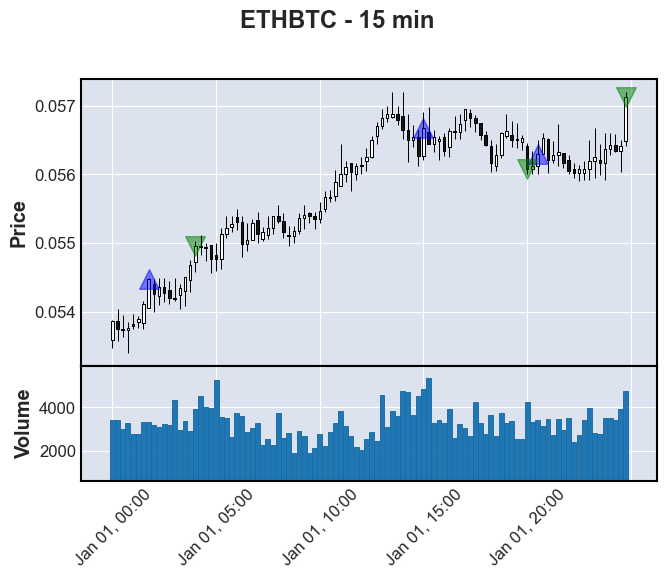

In [6]:
import mplfinance as mpf
import matplotlib.pyplot as plt

mc = mpf.make_marketcolors(up='g',down='r',
                           edge='black',
                           volume='gray')
s  = mpf.make_mpf_style(marketcolors=mc)


def plot_buy_sells(df, decisions):
    
    def build_subplot(df, idxs=[]):
        signals = pd.Series(np.NaN, index=df.index)
        prices = df.loc[idxs]['close'].values
        for i,p in zip(idxs,prices):
            signals.at[i]=p
        return signals
    
    buy_signal = build_subplot(df, decisions[decisions==1].index)
    sell_signal = build_subplot(df, decisions[decisions==-1].index)
    
    
    apds=[mpf.make_addplot(buy_signal, type='scatter', markersize=200, marker='^',color='b', alpha=0.5),
          mpf.make_addplot(sell_signal, type='scatter', markersize=200, marker='v',color='g', alpha=0.5),
         ]

    fig, ax = mpf.plot(df.set_index('open_time'),
                       type='candlestick',
                       volume=True, title=f"ETHBTC - 15 min",
                       returnfig=True,
                       addplot=apds,
                      )
    
    return fig,ax

fig,ax = plot_buy_sells(batch_data, batch_model_decision)

plt.show()

# STOP

You shouldn't need to modify anything below this cell

# CODE FOR SIMULATION STARTS

In [2]:
import psycopg2
import pandas as pd
import numpy as np
import re

# models
import trade_models

In [3]:
# local postgres connection only
import hidden
sql_string = hidden.psycopg2(hidden.secrets())
print('PostgreSQL connection data taken from hidden.py')

# Make the connection and cursor
conn = psycopg2.connect(sql_string, connect_timeout=3)

PostgreSQL connection data taken from hidden.py


In [4]:
# validate inputs and portfolio parameters

import datetime
def validate(date_text):
    try:
        datetime.datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")
        
# validate start / end string format input to protect against injection
validate(start_simulation)
validate(end_simulation)

for p in portfolios:
    # validate symbol
    assert re.match('^[A-Z]{2,}$', p['starting_coin']), f"{p['starting_coin']} is invalid starting coin"
    assert re.match('^[A-Z]{2,}$', p['pair_coin']), f"{p['pair_coin']} is invalid pair coin"

    # validate starting funds
    assert p['starting_funds'] > 0, "Starting funds for must be > 0"

    # validate batch size
    assert (isinstance(p['max_batch_size'], int) and p['max_batch_size'] > 0), f"{p['max_batch_size']} is not a valid batch size"

    # maybe we should validate model names too!
    # TODO: validate model names

In [5]:
def get_pair_data(base_coin, other_coin):
    sql = f"""
    select
        p.*
    from pairs p
    where
        (p.coin1 = '{base_coin}' and p.coin2 = '{other_coin}')
    """
    df = pd.read_sql_query(sql, conn)
    if len(df) == 0:
        return None
    else:
        return df.iloc[0]

In [6]:
def get_batch_data(pair_id, start_time, end_time, batch_size):
    sql = f"""select * from (select
    *,
    LAG(open,1) over (order by open_time) open_1,LAG(open,2) over (order by open_time) open_2,LAG(open,3) over (order by open_time) open_3,LAG(open,4) over (order by open_time) open_4,LAG(open,5) over (order by open_time) open_5,LAG(open,6) over (order by open_time) open_6,LAG(open,7) over (order by open_time) open_7,LAG(open,8) over (order by open_time) open_8,LAG(open,9) over (order by open_time) open_9,LAG(open,10) over (order by open_time) open_10,LAG(open,11) over (order by open_time) open_11,LAG(open,12) over (order by open_time) open_12,LAG(open,13) over (order by open_time) open_13,LAG(open,14) over (order by open_time) open_14,LAG(high,1) over (order by open_time) high_1,LAG(high,2) over (order by open_time) high_2,LAG(high,3) over (order by open_time) high_3,LAG(high,4) over (order by open_time) high_4,LAG(high,5) over (order by open_time) high_5,LAG(high,6) over (order by open_time) high_6,LAG(high,7) over (order by open_time) high_7,LAG(high,8) over (order by open_time) high_8,LAG(high,9) over (order by open_time) high_9,LAG(high,10) over (order by open_time) high_10,LAG(high,11) over (order by open_time) high_11,LAG(high,12) over (order by open_time) high_12,LAG(high,13) over (order by open_time) high_13,LAG(high,14) over (order by open_time) high_14,LAG(low,1) over (order by open_time) low_1,LAG(low,2) over (order by open_time) low_2,LAG(low,3) over (order by open_time) low_3,LAG(low,4) over (order by open_time) low_4,LAG(low,5) over (order by open_time) low_5,LAG(low,6) over (order by open_time) low_6,LAG(low,7) over (order by open_time) low_7,LAG(low,8) over (order by open_time) low_8,LAG(low,9) over (order by open_time) low_9,LAG(low,10) over (order by open_time) low_10,LAG(low,11) over (order by open_time) low_11,LAG(low,12) over (order by open_time) low_12,LAG(low,13) over (order by open_time) low_13,LAG(low,14) over (order by open_time) low_14,LAG(close,1) over (order by open_time) close_1,LAG(close,2) over (order by open_time) close_2,LAG(close,3) over (order by open_time) close_3,LAG(close,4) over (order by open_time) close_4,LAG(close,5) over (order by open_time) close_5,LAG(close,6) over (order by open_time) close_6,LAG(close,7) over (order by open_time) close_7,LAG(close,8) over (order by open_time) close_8,LAG(close,9) over (order by open_time) close_9,LAG(close,10) over (order by open_time) close_10,LAG(close,11) over (order by open_time) close_11,LAG(close,12) over (order by open_time) close_12,LAG(close,13) over (order by open_time) close_13,LAG(close,14) over (order by open_time) close_14,LAG(ma14,1) over (order by open_time) ma14_1,LAG(ma14,2) over (order by open_time) ma14_2,LAG(ma14,3) over (order by open_time) ma14_3,LAG(ma14,4) over (order by open_time) ma14_4,LAG(ma14,5) over (order by open_time) ma14_5,LAG(ma14,6) over (order by open_time) ma14_6,LAG(ma14,7) over (order by open_time) ma14_7,LAG(ma14,8) over (order by open_time) ma14_8,LAG(ma14,9) over (order by open_time) ma14_9,LAG(ma14,10) over (order by open_time) ma14_10,LAG(ma14,11) over (order by open_time) ma14_11,LAG(ma14,12) over (order by open_time) ma14_12,LAG(ma14,13) over (order by open_time) ma14_13,LAG(ma14,14) over (order by open_time) ma14_14,LAG(ma30,1) over (order by open_time) ma30_1,LAG(ma30,2) over (order by open_time) ma30_2,LAG(ma30,3) over (order by open_time) ma30_3,LAG(ma30,4) over (order by open_time) ma30_4,LAG(ma30,5) over (order by open_time) ma30_5,LAG(ma30,6) over (order by open_time) ma30_6,LAG(ma30,7) over (order by open_time) ma30_7,LAG(ma30,8) over (order by open_time) ma30_8,LAG(ma30,9) over (order by open_time) ma30_9,LAG(ma30,10) over (order by open_time) ma30_10,LAG(ma30,11) over (order by open_time) ma30_11,LAG(ma30,12) over (order by open_time) ma30_12,LAG(ma30,13) over (order by open_time) ma30_13,LAG(ma30,14) over (order by open_time) ma30_14,LAG(ma90,1) over (order by open_time) ma90_1,LAG(ma90,2) over (order by open_time) ma90_2,LAG(ma90,3) over (order by open_time) ma90_3,LAG(ma90,4) over (order by open_time) ma90_4,LAG(ma90,5) over (order by open_time) ma90_5,LAG(ma90,6) over (order by open_time) ma90_6,LAG(ma90,7) over (order by open_time) ma90_7,LAG(ma90,8) over (order by open_time) ma90_8,LAG(ma90,9) over (order by open_time) ma90_9,LAG(ma90,10) over (order by open_time) ma90_10,LAG(ma90,11) over (order by open_time) ma90_11,LAG(ma90,12) over (order by open_time) ma90_12,LAG(ma90,13) over (order by open_time) ma90_13,LAG(ma90,14) over (order by open_time) ma90_14,LAG(atr,1) over (order by open_time) atr_1,LAG(atr,2) over (order by open_time) atr_2,LAG(atr,3) over (order by open_time) atr_3,LAG(atr,4) over (order by open_time) atr_4,LAG(atr,5) over (order by open_time) atr_5,LAG(atr,6) over (order by open_time) atr_6,LAG(atr,7) over (order by open_time) atr_7,LAG(atr,8) over (order by open_time) atr_8,LAG(atr,9) over (order by open_time) atr_9,LAG(atr,10) over (order by open_time) atr_10,LAG(atr,11) over (order by open_time) atr_11,LAG(atr,12) over (order by open_time) atr_12,LAG(atr,13) over (order by open_time) atr_13,LAG(atr,14) over (order by open_time) atr_14,LAG(atr_diff,1) over (order by open_time) atr_diff_1,LAG(atr_diff,2) over (order by open_time) atr_diff_2,LAG(atr_diff,3) over (order by open_time) atr_diff_3,LAG(atr_diff,4) over (order by open_time) atr_diff_4,LAG(atr_diff,5) over (order by open_time) atr_diff_5,LAG(atr_diff,6) over (order by open_time) atr_diff_6,LAG(atr_diff,7) over (order by open_time) atr_diff_7,LAG(atr_diff,8) over (order by open_time) atr_diff_8,LAG(atr_diff,9) over (order by open_time) atr_diff_9,LAG(atr_diff,10) over (order by open_time) atr_diff_10,LAG(atr_diff,11) over (order by open_time) atr_diff_11,LAG(atr_diff,12) over (order by open_time) atr_diff_12,LAG(atr_diff,13) over (order by open_time) atr_diff_13,LAG(atr_diff,14) over (order by open_time) atr_diff_14,LAG(atr_ma14,1) over (order by open_time) atr_ma14_1,LAG(atr_ma14,2) over (order by open_time) atr_ma14_2,LAG(atr_ma14,3) over (order by open_time) atr_ma14_3,LAG(atr_ma14,4) over (order by open_time) atr_ma14_4,LAG(atr_ma14,5) over (order by open_time) atr_ma14_5,LAG(atr_ma14,6) over (order by open_time) atr_ma14_6,LAG(atr_ma14,7) over (order by open_time) atr_ma14_7,LAG(atr_ma14,8) over (order by open_time) atr_ma14_8,LAG(atr_ma14,9) over (order by open_time) atr_ma14_9,LAG(atr_ma14,10) over (order by open_time) atr_ma14_10,LAG(atr_ma14,11) over (order by open_time) atr_ma14_11,LAG(atr_ma14,12) over (order by open_time) atr_ma14_12,LAG(atr_ma14,13) over (order by open_time) atr_ma14_13,LAG(atr_ma14,14) over (order by open_time) atr_ma14_14,LAG(rsi,1) over (order by open_time) rsi_1,LAG(rsi,2) over (order by open_time) rsi_2,LAG(rsi,3) over (order by open_time) rsi_3,LAG(rsi,4) over (order by open_time) rsi_4,LAG(rsi,5) over (order by open_time) rsi_5,LAG(rsi,6) over (order by open_time) rsi_6,LAG(rsi,7) over (order by open_time) rsi_7,LAG(rsi,8) over (order by open_time) rsi_8,LAG(rsi,9) over (order by open_time) rsi_9,LAG(rsi,10) over (order by open_time) rsi_10,LAG(rsi,11) over (order by open_time) rsi_11,LAG(rsi,12) over (order by open_time) rsi_12,LAG(rsi,13) over (order by open_time) rsi_13,LAG(rsi,14) over (order by open_time) rsi_14,LAG(rsi_diff,1) over (order by open_time) rsi_diff_1,LAG(rsi_diff,2) over (order by open_time) rsi_diff_2,LAG(rsi_diff,3) over (order by open_time) rsi_diff_3,LAG(rsi_diff,4) over (order by open_time) rsi_diff_4,LAG(rsi_diff,5) over (order by open_time) rsi_diff_5,LAG(rsi_diff,6) over (order by open_time) rsi_diff_6,LAG(rsi_diff,7) over (order by open_time) rsi_diff_7,LAG(rsi_diff,8) over (order by open_time) rsi_diff_8,LAG(rsi_diff,9) over (order by open_time) rsi_diff_9,LAG(rsi_diff,10) over (order by open_time) rsi_diff_10,LAG(rsi_diff,11) over (order by open_time) rsi_diff_11,LAG(rsi_diff,12) over (order by open_time) rsi_diff_12,LAG(rsi_diff,13) over (order by open_time) rsi_diff_13,LAG(rsi_diff,14) over (order by open_time) rsi_diff_14,LAG(rsi_ma14,1) over (order by open_time) rsi_ma14_1,LAG(rsi_ma14,2) over (order by open_time) rsi_ma14_2,LAG(rsi_ma14,3) over (order by open_time) rsi_ma14_3,LAG(rsi_ma14,4) over (order by open_time) rsi_ma14_4,LAG(rsi_ma14,5) over (order by open_time) rsi_ma14_5,LAG(rsi_ma14,6) over (order by open_time) rsi_ma14_6,LAG(rsi_ma14,7) over (order by open_time) rsi_ma14_7,LAG(rsi_ma14,8) over (order by open_time) rsi_ma14_8,LAG(rsi_ma14,9) over (order by open_time) rsi_ma14_9,LAG(rsi_ma14,10) over (order by open_time) rsi_ma14_10,LAG(rsi_ma14,11) over (order by open_time) rsi_ma14_11,LAG(rsi_ma14,12) over (order by open_time) rsi_ma14_12,LAG(rsi_ma14,13) over (order by open_time) rsi_ma14_13,LAG(rsi_ma14,14) over (order by open_time) rsi_ma14_14,LAG(trend_up,1) over (order by open_time) trend_up_1,LAG(trend_up,2) over (order by open_time) trend_up_2,LAG(trend_up,3) over (order by open_time) trend_up_3,LAG(trend_up,4) over (order by open_time) trend_up_4,LAG(trend_up,5) over (order by open_time) trend_up_5,LAG(trend_up,6) over (order by open_time) trend_up_6,LAG(trend_up,7) over (order by open_time) trend_up_7,LAG(trend_up,8) over (order by open_time) trend_up_8,LAG(trend_up,9) over (order by open_time) trend_up_9,LAG(trend_up,10) over (order by open_time) trend_up_10,LAG(trend_up,11) over (order by open_time) trend_up_11,LAG(trend_up,12) over (order by open_time) trend_up_12,LAG(trend_up,13) over (order by open_time) trend_up_13,LAG(trend_up,14) over (order by open_time) trend_up_14,LAG(trend_up3,1) over (order by open_time) trend_up3_1,LAG(trend_up3,2) over (order by open_time) trend_up3_2,LAG(trend_up3,3) over (order by open_time) trend_up3_3,LAG(trend_up3,4) over (order by open_time) trend_up3_4,LAG(trend_up3,5) over (order by open_time) trend_up3_5,LAG(trend_up3,6) over (order by open_time) trend_up3_6,LAG(trend_up3,7) over (order by open_time) trend_up3_7,LAG(trend_up3,8) over (order by open_time) trend_up3_8,LAG(trend_up3,9) over (order by open_time) trend_up3_9,LAG(trend_up3,10) over (order by open_time) trend_up3_10,LAG(trend_up3,11) over (order by open_time) trend_up3_11,LAG(trend_up3,12) over (order by open_time) trend_up3_12,LAG(trend_up3,13) over (order by open_time) trend_up3_13,LAG(trend_up3,14) over (order by open_time) trend_up3_14,LAG(trend_up14,1) over (order by open_time) trend_up14_1,LAG(trend_up14,2) over (order by open_time) trend_up14_2,LAG(trend_up14,3) over (order by open_time) trend_up14_3,LAG(trend_up14,4) over (order by open_time) trend_up14_4,LAG(trend_up14,5) over (order by open_time) trend_up14_5,LAG(trend_up14,6) over (order by open_time) trend_up14_6,LAG(trend_up14,7) over (order by open_time) trend_up14_7,LAG(trend_up14,8) over (order by open_time) trend_up14_8,LAG(trend_up14,9) over (order by open_time) trend_up14_9,LAG(trend_up14,10) over (order by open_time) trend_up14_10,LAG(trend_up14,11) over (order by open_time) trend_up14_11,LAG(trend_up14,12) over (order by open_time) trend_up14_12,LAG(trend_up14,13) over (order by open_time) trend_up14_13,LAG(trend_up14,14) over (order by open_time) trend_up14_14,LAG(trend_up30,1) over (order by open_time) trend_up30_1,LAG(trend_up30,2) over (order by open_time) trend_up30_2,LAG(trend_up30,3) over (order by open_time) trend_up30_3,LAG(trend_up30,4) over (order by open_time) trend_up30_4,LAG(trend_up30,5) over (order by open_time) trend_up30_5,LAG(trend_up30,6) over (order by open_time) trend_up30_6,LAG(trend_up30,7) over (order by open_time) trend_up30_7,LAG(trend_up30,8) over (order by open_time) trend_up30_8,LAG(trend_up30,9) over (order by open_time) trend_up30_9,LAG(trend_up30,10) over (order by open_time) trend_up30_10,LAG(trend_up30,11) over (order by open_time) trend_up30_11,LAG(trend_up30,12) over (order by open_time) trend_up30_12,LAG(trend_up30,13) over (order by open_time) trend_up30_13,LAG(trend_up30,14) over (order by open_time) trend_up30_14,LAG(cs_ss,1) over (order by open_time) cs_ss_1,LAG(cs_ss,2) over (order by open_time) cs_ss_2,LAG(cs_ss,3) over (order by open_time) cs_ss_3,LAG(cs_ss,4) over (order by open_time) cs_ss_4,LAG(cs_ss,5) over (order by open_time) cs_ss_5,LAG(cs_ss,6) over (order by open_time) cs_ss_6,LAG(cs_ss,7) over (order by open_time) cs_ss_7,LAG(cs_ss,8) over (order by open_time) cs_ss_8,LAG(cs_ss,9) over (order by open_time) cs_ss_9,LAG(cs_ss,10) over (order by open_time) cs_ss_10,LAG(cs_ss,11) over (order by open_time) cs_ss_11,LAG(cs_ss,12) over (order by open_time) cs_ss_12,LAG(cs_ss,13) over (order by open_time) cs_ss_13,LAG(cs_ss,14) over (order by open_time) cs_ss_14,LAG(cs_ssr,1) over (order by open_time) cs_ssr_1,LAG(cs_ssr,2) over (order by open_time) cs_ssr_2,LAG(cs_ssr,3) over (order by open_time) cs_ssr_3,LAG(cs_ssr,4) over (order by open_time) cs_ssr_4,LAG(cs_ssr,5) over (order by open_time) cs_ssr_5,LAG(cs_ssr,6) over (order by open_time) cs_ssr_6,LAG(cs_ssr,7) over (order by open_time) cs_ssr_7,LAG(cs_ssr,8) over (order by open_time) cs_ssr_8,LAG(cs_ssr,9) over (order by open_time) cs_ssr_9,LAG(cs_ssr,10) over (order by open_time) cs_ssr_10,LAG(cs_ssr,11) over (order by open_time) cs_ssr_11,LAG(cs_ssr,12) over (order by open_time) cs_ssr_12,LAG(cs_ssr,13) over (order by open_time) cs_ssr_13,LAG(cs_ssr,14) over (order by open_time) cs_ssr_14,LAG(cs_hm,1) over (order by open_time) cs_hm_1,LAG(cs_hm,2) over (order by open_time) cs_hm_2,LAG(cs_hm,3) over (order by open_time) cs_hm_3,LAG(cs_hm,4) over (order by open_time) cs_hm_4,LAG(cs_hm,5) over (order by open_time) cs_hm_5,LAG(cs_hm,6) over (order by open_time) cs_hm_6,LAG(cs_hm,7) over (order by open_time) cs_hm_7,LAG(cs_hm,8) over (order by open_time) cs_hm_8,LAG(cs_hm,9) over (order by open_time) cs_hm_9,LAG(cs_hm,10) over (order by open_time) cs_hm_10,LAG(cs_hm,11) over (order by open_time) cs_hm_11,LAG(cs_hm,12) over (order by open_time) cs_hm_12,LAG(cs_hm,13) over (order by open_time) cs_hm_13,LAG(cs_hm,14) over (order by open_time) cs_hm_14,LAG(cs_hmr,1) over (order by open_time) cs_hmr_1,LAG(cs_hmr,2) over (order by open_time) cs_hmr_2,LAG(cs_hmr,3) over (order by open_time) cs_hmr_3,LAG(cs_hmr,4) over (order by open_time) cs_hmr_4,LAG(cs_hmr,5) over (order by open_time) cs_hmr_5,LAG(cs_hmr,6) over (order by open_time) cs_hmr_6,LAG(cs_hmr,7) over (order by open_time) cs_hmr_7,LAG(cs_hmr,8) over (order by open_time) cs_hmr_8,LAG(cs_hmr,9) over (order by open_time) cs_hmr_9,LAG(cs_hmr,10) over (order by open_time) cs_hmr_10,LAG(cs_hmr,11) over (order by open_time) cs_hmr_11,LAG(cs_hmr,12) over (order by open_time) cs_hmr_12,LAG(cs_hmr,13) over (order by open_time) cs_hmr_13,LAG(cs_hmr,14) over (order by open_time) cs_hmr_14,LAG(cs_brh,1) over (order by open_time) cs_brh_1,LAG(cs_brh,2) over (order by open_time) cs_brh_2,LAG(cs_brh,3) over (order by open_time) cs_brh_3,LAG(cs_brh,4) over (order by open_time) cs_brh_4,LAG(cs_brh,5) over (order by open_time) cs_brh_5,LAG(cs_brh,6) over (order by open_time) cs_brh_6,LAG(cs_brh,7) over (order by open_time) cs_brh_7,LAG(cs_brh,8) over (order by open_time) cs_brh_8,LAG(cs_brh,9) over (order by open_time) cs_brh_9,LAG(cs_brh,10) over (order by open_time) cs_brh_10,LAG(cs_brh,11) over (order by open_time) cs_brh_11,LAG(cs_brh,12) over (order by open_time) cs_brh_12,LAG(cs_brh,13) over (order by open_time) cs_brh_13,LAG(cs_brh,14) over (order by open_time) cs_brh_14,LAG(cs_buh,1) over (order by open_time) cs_buh_1,LAG(cs_buh,2) over (order by open_time) cs_buh_2,LAG(cs_buh,3) over (order by open_time) cs_buh_3,LAG(cs_buh,4) over (order by open_time) cs_buh_4,LAG(cs_buh,5) over (order by open_time) cs_buh_5,LAG(cs_buh,6) over (order by open_time) cs_buh_6,LAG(cs_buh,7) over (order by open_time) cs_buh_7,LAG(cs_buh,8) over (order by open_time) cs_buh_8,LAG(cs_buh,9) over (order by open_time) cs_buh_9,LAG(cs_buh,10) over (order by open_time) cs_buh_10,LAG(cs_buh,11) over (order by open_time) cs_buh_11,LAG(cs_buh,12) over (order by open_time) cs_buh_12,LAG(cs_buh,13) over (order by open_time) cs_buh_13,LAG(cs_buh,14) over (order by open_time) cs_buh_14,LAG(cs_ebu,1) over (order by open_time) cs_ebu_1,LAG(cs_ebu,2) over (order by open_time) cs_ebu_2,LAG(cs_ebu,3) over (order by open_time) cs_ebu_3,LAG(cs_ebu,4) over (order by open_time) cs_ebu_4,LAG(cs_ebu,5) over (order by open_time) cs_ebu_5,LAG(cs_ebu,6) over (order by open_time) cs_ebu_6,LAG(cs_ebu,7) over (order by open_time) cs_ebu_7,LAG(cs_ebu,8) over (order by open_time) cs_ebu_8,LAG(cs_ebu,9) over (order by open_time) cs_ebu_9,LAG(cs_ebu,10) over (order by open_time) cs_ebu_10,LAG(cs_ebu,11) over (order by open_time) cs_ebu_11,LAG(cs_ebu,12) over (order by open_time) cs_ebu_12,LAG(cs_ebu,13) over (order by open_time) cs_ebu_13,LAG(cs_ebu,14) over (order by open_time) cs_ebu_14,LAG(cs_ebr,1) over (order by open_time) cs_ebr_1,LAG(cs_ebr,2) over (order by open_time) cs_ebr_2,LAG(cs_ebr,3) over (order by open_time) cs_ebr_3,LAG(cs_ebr,4) over (order by open_time) cs_ebr_4,LAG(cs_ebr,5) over (order by open_time) cs_ebr_5,LAG(cs_ebr,6) over (order by open_time) cs_ebr_6,LAG(cs_ebr,7) over (order by open_time) cs_ebr_7,LAG(cs_ebr,8) over (order by open_time) cs_ebr_8,LAG(cs_ebr,9) over (order by open_time) cs_ebr_9,LAG(cs_ebr,10) over (order by open_time) cs_ebr_10,LAG(cs_ebr,11) over (order by open_time) cs_ebr_11,LAG(cs_ebr,12) over (order by open_time) cs_ebr_12,LAG(cs_ebr,13) over (order by open_time) cs_ebr_13,LAG(cs_ebr,14) over (order by open_time) cs_ebr_14
from
(select 
    cm.pair_id, cm.open_time, cm.close_time,
    f.dow, f.tod,
    cm.volume, cm.quote_asset_volume, cm.number_of_trades, cm.taker_buy_base_asset_volume, cm.taker_buy_quote_asset_volume,
    cm.open, cm.high, cm.low, cm.close,
    f.ma14, f.ma30, f.ma90,
    f.atr, f.atr_diff, f.atr_ma14,
    f.rsi, f.rsi_diff, f.rsi_ma14,
    f.trend_up, f.trend_up3, f.trend_up14, f.trend_up30,
    f.cs_ss, f.cs_ssr, f.cs_hm, f.cs_hmr, f.cs_brh, f.cs_buh, f.cs_ebu, f.cs_ebr
from
    ((select * from candlestick_15m where close_time notnull
            and pair_id = {pair_id}
            and open_time < '{start_time}'
        order by open_time desc limit 14)
    union all
        (select * from candlestick_15m where close_time notnull
            and pair_id = {pair_id}
            and open_time between '{start_time}' and '{end_time}'
        order by open_time limit {batch_size})) cm
inner join
    features f
on
    f.pair_id = cm.pair_id and f.candle_open_time = cm.open_time) data) final where open_time >= '{start_time}' order by open_time"""
    df = pd.read_sql_query(sql, conn)

    return df

In [7]:
def simulate_portfolio(start_time, end_time, portfolio):
    portfolio_name = portfolio['portfolio_name']
    trade_model = portfolio['trade_model']
    starting_coin = portfolio['starting_coin']
    pair_coin = portfolio['pair_coin']
    max_batch_size = portfolio['max_batch_size']
    starting_funds = portfolio['starting_funds']
    
    pair_data = get_pair_data(starting_coin, pair_coin)

    model = trade_models.__dict__[trade_model]
    columns = model.columns()

    current_time = start_time
    all_output = []
    
    info_dict = {'portfolio':portfolio}

    while True:
        # this batch data should also include feature engineering
        batch_data = get_batch_data(pair_data['id'], current_time, end_time, max_batch_size)
        print(current_time, len(batch_data))
        if len(batch_data) == 0:
            break

        batch_model_decision = model.make_decision(batch_data[columns], info_dict)

        output = batch_data[['open_time','open', 'high', 'low', 'close']].copy()
        output['trade_decision'] = batch_model_decision

        all_output.append(output)
        current_time = batch_data['close_time'].max()

    results = pd.concat(all_output).set_index('open_time')
    
    results[['fund1','fund2','action']] = np.nan
    cur_funds = [starting_funds,0]
    results.iloc[0, results.columns.get_loc('fund1')] = starting_funds
    results.iloc[0, results.columns.get_loc('fund2')] = 0

    for x,r in results.iterrows():
        if cur_funds[0] > 0:
            if r['trade_decision'] == 1:
                cur_funds[1] = (cur_funds[0] * r['close'])
                cur_funds[0] = 0
                results.loc[x,'fund1'] = cur_funds[0]
                results.loc[x,'fund2'] = cur_funds[1]
                results.loc[x,'action'] = 'buy'
        else:
            if r['trade_decision'] == -1:
                cur_funds[0] = (cur_funds[1] / r['open'])
                cur_funds[1] = 0
                results.loc[x,'fund1'] = cur_funds[0]
                results.loc[x,'fund2'] = cur_funds[1]
                results.loc[x,'action'] = 'sell'
    results[['fund1','fund2']] = results[['fund1','fund2']].ffill()
    results['total_value'] = results['fund1'] + results['fund2'] / results['close']
    results['action'] = results['action'].fillna('none')
    return portfolio_name, results

In [8]:
simulation_results = {}

for p in portfolios:
    print(f"Simulating \"{p['portfolio_name']}\"")
    name, res = simulate_portfolio(start_simulation, end_simulation, p)
    simulation_results[name] = res
    print(f"Final value: {res.iloc[-1,-1]}\n\n")

Simulating "ETH <-> BTC n0_alpha1_ethbtc"
2021-01-01 10000
2021-04-15 06:44:59.999000 8202
2021-07-10 00:14:59 0
Final value: 2.665636380429374




# END SIMULATION

# THIS IS HOW YOU GET THE LATEST DATA FROM RDS

In [9]:
# %%time
# df = get_batch_data(pair_id=0, start_time='2018-01-01', end_time='2021-12-31', batch_size=1000000)

In [10]:
for k,v in simulation_results.items():
    print(k)
    print(f"Portfolio simulation for {p['starting_funds']} {p['starting_coin']} trading against {p['pair_coin']}")
    display(v[v['action']!='none'])
    display(v['action'].value_counts())

ETH <-> BTC n0_alpha1_ethbtc
Portfolio simulation for 1 ETH trading against BTC


,open,high,low,close,trade_decision,fund1,fund2,action,total_value
open_time,,,,,,,,,
2021-01-01 01:30:00,0.025258,0.025492,0.025246,0.025482,1,0.000000,0.025482,buy,1.000000
2021-01-01 08:15:00,0.025282,0.025299,0.025100,0.025149,-1,1.007911,0.000000,sell,1.007911
2021-01-01 08:45:00,0.025095,0.025183,0.025084,0.025174,1,0.000000,0.025373,buy,1.007911
2021-01-01 11:30:00,0.025217,0.025266,0.025192,0.025232,-1,1.006192,0.000000,sell,1.006192
2021-01-01 15:15:00,0.025114,0.025253,0.025110,0.025243,1,0.000000,0.025399,buy,1.006192
...,...,...,...,...,...,...,...,...,...
2021-07-09 08:15:00,0.064294,0.064301,0.063974,0.063992,-1,2.633844,0.000000,sell,2.633844
2021-07-09 12:30:00,0.063240,0.063483,0.063141,0.063472,1,0.000000,0.167175,buy,2.633844
2021-07-09 12:45:00,0.063469,0.064011,0.063412,0.063999,-1,2.633968,0.000000,sell,2.633968


none    17020
sell      591
buy       591
Name: action, dtype: int64

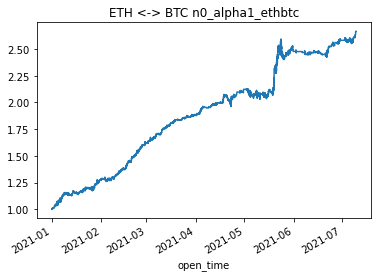

In [11]:
import matplotlib.pyplot as plt
for k,v in simulation_results.items():
    fig, ax = plt.subplots()
    ax.set_title(k)
    v.total_value.plot(figure=fig)